# Topic Modelling

In [3]:
import pandas as pd

### Read The Data

In [4]:
data = pd.read_excel('text_classification_dataset.xlsx')  
# data = pd.read_csv()
# data = pd.read_json()


data.shape
data['index'] = data.index
print("Top 10 rows in the dataframe\n")
data.head(10)


Top 10 rows in the dataframe



,text,type,index
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports,0
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports,1
2,The current state of last year's @BBL finalist...,sports,2
3,@HOLLYJISOO Why did you bring a cricket...,sports,3
4,Babar Azam only Pakistani included in the ICC ...,sports,4
5,RT @IExpressSports: #INDvAUS \n\nRishabh Pant ...,sports,5
6,RT @ThinkBoiseFirst: @BoiseFryCo &amp; Idaho c...,sports,6
7,RT @GabbbarSingh: I'm surprised a lot of peopl...,sports,7
8,RT @BCCI: The ICC ODI Cricketer of the Year aw...,sports,8
9,RT @WajidAfridi551: #1YearOfTeamISF \nImran Kh...,sports,9


In [5]:
print("The shape of original data set ")
data.shape

The shape of original data set 


(611, 3)

In [6]:
# data['Topic and Des'] = data['Description'].combine_first(data['Topics'])
# data.head(10)

In [7]:

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re

In [8]:
df = data[data['text'].notna()]

In [9]:
Text = pd.concat([df['type'], df['text']], axis=1, keys=['Division', 'Description'])

In [10]:
# Text.head()

In [11]:
# Text.shape

In [153]:
Text = Text.dropna()
Text.shape

(333, 7)

### Remove Stop Words

In [13]:
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')


def remove_stopwords(documents):
    x = []
    for line in documents:
        l = line.split()
        cleaned = [word for word in l if word not in stop_words]
        s = " "
        s = s.join(cleaned)
        x.append(s)
    return x


x = remove_stopwords(Text['Description'])
Text['removed_stopword'] = x

[nltk_data] Downloading package stopwords to C:\Users\Sravya
[nltk_data]     Bhaskara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Text.head()

### Remove Punctuation

In [15]:
def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#     print(string)
    for x in string: 
        if x in punctuations: 
            string = string.replace(x, "") 
    return string

u = []
for line in Text['removed_stopword']:
    x = Punctuation(line)
    u.append(x)
    
Text['removed_punctuation'] = u

In [16]:
# Text.head()

### Stemming

In [17]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(stringlist):
    s = " "
    for word in stringlist:
        s = s + porter.stem(word) + " "
    return s

s = []
for line in Text['removed_punctuation']:
    l = line.split(" ")
    x = stemmer(l)
    s.append(x)
    
Text['Updated'] = s

In [18]:
Text.head()

,Division,Description,removed_stopword,removed_punctuation,Updated
0,sports,@ACNI2012 @TheToka920 Never knew having 1 or 2...,@ACNI2012 @TheToka920 Never knew 1 2 followers...,ACNI2012 TheToka920 Never knew 1 2 followers a...,acni2012 thetoka920 never knew 1 2 follow any...
1,sports,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...","MYCA Magical Moments: September, 2011: Sham Ch...",MYCA Magical Moments September 2011 Sham Choto...,myca magic moment septemb 2011 sham chotoo bo...
2,sports,The current state of last year's @BBL finalist...,The current state last year's @BBL finalists -...,The current state last years BBL finalists St...,the current state last year bbl finalist sta...
3,sports,@HOLLYJISOO Why did you bring a cricket...,@HOLLYJISOO Why bring cricket...,HOLLYJISOO Why bring cricket,hollyjisoo whi bring cricket
4,sports,Babar Azam only Pakistani included in the ICC ...,Babar Azam Pakistani included ICC ODI team yea...,Babar Azam Pakistani included ICC ODI team yea...,babar azam pakistani includ icc odi team year...


In [19]:
# print the text data of all the documents (rows)

# for t in Text['Updated']:
#     print(t)

In [20]:

print("The dataset has the following shape after removing stop words, punctuation and applying stemming.")
Text.shape

The dataset has the following shape after removing stop words, punctuation and applying stemming.


(333, 5)

<!-- ### TF - IDF -->

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# tfidf.fit(Text['Updated'])
# feature_names = tfidf.get_feature_names()
# # prints all the words in the documents
# # print(feature_names)
# print("Number of feature names ",len(feature_names))
# print("\n")
# def get_tfidf_for_words(text):
#     tfidf_matrix= tfidf.transform([text]).todense()
#     feature_index = tfidf_matrix[0,:].nonzero()[1]
#     tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
#     return dict(tfidf_scores)

# # Call the function to get word with tf-idf score
# for text in Text['Updated']:
#     text = str(text)
#     print(get_tfidf_for_words(text))
    

In [22]:
# #prints tf-idf matrix where the rows are the number of documents and columns are the feature words (all the words in documents)
# # The matrix element is the score of the word in particular document.
# def tfidf_matrix():
#     tfidf_matrix = tfidf.fit_transform(Text['Updated'])
#     tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names())
#     print("Size of the Matrix", tfidf_matrix.shape)
#     print(tfidf_matrix)
    
    
# tfidf_matrix()

# 1.  Word2Vec

In [23]:
data = Text['Updated'].to_list()
datanew = []

# Converts the dataframe to list and has words in the form of array of lists
for d in data:
    datanew.append(d.split())
    
# datanew

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings  
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer
from gensim.models import phrases, word2vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist


### Set the hyperparameters

In [25]:
from nltk.cluster.kmeans import KMeansClusterer
from sklearn.cluster import KMeans

def vectorizer(sent, model):
    vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                vec = model[w]
            else:
                vec = np.add(vec, m[w])
            numw += 1
        except:
            pass
    return np.asarray(vec) / numw

def hyperparametersW(): 
    bigrams = phrases.Phrases(datanew)
    params = []
    distortions = []

    # model = Word2Vec(datanew, size=10, window=4, workers=4)
    
    for p in range(1, 6):
#         for p in range(1, 5):
#             print("for dimension: ",n, " For window size", p)
        model1 = Word2Vec(datanew, size=50, window=p, min_count=2, workers=4)
        word_vectors = model1.wv   
        l = []
        for i in datanew:
            l.append(vectorizer(i, model1))

        word2vec_vectors = pd.DataFrame([l[0]])
        for i in range(1, len(l)):
            additional_row = pd.DataFrame([l[i]])
            word2vec_vectors = word2vec_vectors.append(additional_row)

#             print(word2vec_vectors.shape)
        # print(word2vec_vectors)
        # np.where(word2vec_vectors.values >= np.finfo(np.float64).max)
        word2vec_vectors[word2vec_vectors==np.inf]=np.nan
        word2vec_vectors.fillna(word2vec_vectors.mean(), inplace=True)

        params.append(p)
        no = 4
        kmeans = KMeans (n_clusters = no,
                        max_iter = 100,
                        init = 'k-means++',
                        n_init = 1)

        K_labels = kmeans.fit_predict(word2vec_vectors)
        distortions.append(sum(np.min(cdist(word2vec_vectors, kmeans.cluster_centers_, 'euclidean'), axis=1)) / word2vec_vectors.shape[0])


#             clusterReport(word2vec_vectors, K_labels)
#             print("\n")
    return params, distortions

def hyperparametersD(): 
    bigrams = phrases.Phrases(datanew)
    params = []
    distortions = []

    # model = Word2Vec(datanew, size=10, window=4, workers=4)
    
    for n in range(10, 101, 10):
#         for p in range(1, 5):
#             print("for dimension: ",n, " For window size", p)
        model1 = Word2Vec(datanew, size=n, window=5, min_count=2, workers=4)
        word_vectors = model1.wv   
        l = []
        for i in datanew:
            l.append(vectorizer(i, model1))

        word2vec_vectors = pd.DataFrame([l[0]])
        for i in range(1, len(l)):
            additional_row = pd.DataFrame([l[i]])
            word2vec_vectors = word2vec_vectors.append(additional_row)

#             print(word2vec_vectors.shape)
        # print(word2vec_vectors)
        # np.where(word2vec_vectors.values >= np.finfo(np.float64).max)
        word2vec_vectors[word2vec_vectors==np.inf]=np.nan
        word2vec_vectors.fillna(word2vec_vectors.mean(), inplace=True)

        params.append(n)
        no = 4
        kmeans = KMeans (n_clusters = no,
                        max_iter = 100,
                        init = 'k-means++',
                        n_init = 1)

        K_labels = kmeans.fit_predict(word2vec_vectors)
        distortions.append(sum(np.min(cdist(word2vec_vectors, kmeans.cluster_centers_, 'euclidean'), axis=1)) / word2vec_vectors.shape[0])


#             clusterReport(word2vec_vectors, K_labels)
#             print("\n")
    return params, distortions

    
#     counting_pair_measures(K_labels, H_labels)
    

In [26]:
params_dimension , distortion_dimension = hyperparametersD()

In [27]:
params_window , distortion_window = hyperparametersW()

In [28]:
# distortion_dimension
# [distortion_dimension[i - 1] - x for i, x in enumerate(distortion_dimension)][1:]

In [29]:
# params_dimension

In [30]:
# distortion_window

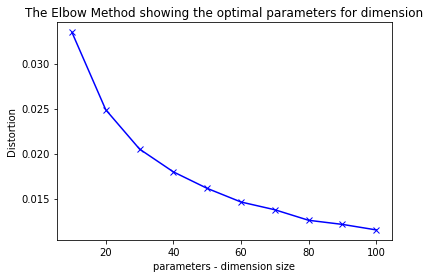

In [31]:
import matplotlib.pyplot as plt

plt.plot(params_dimension, distortion_dimension, 'bx-')
plt.xlabel('parameters - dimension size')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal parameters for dimension')
plt.show()

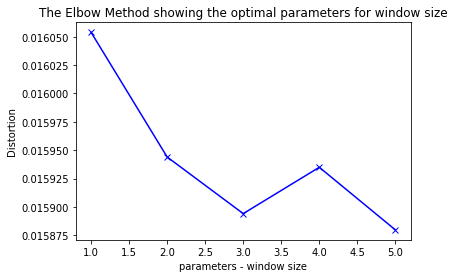

In [32]:
plt.plot(params_window, distortion_window, 'bx-')
plt.xlabel('parameters - window size')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal parameters for window size')
plt.show()

The parameters choses are:
 60 for dimension size and
 5 for window size.
 
The word2vector model is built using four different methods.
1. Word2vector using bigrams
2. Word2vector using bigrams and PCA
3. Word2vector using TFIDF
4. Word2vector using TFIDF and PCA

The word2vector model returns the vectors which are used for clustering 

In [33]:
# Word2Vector with bigrams

# Function vectorizer takes the word2vec model and 
# returns the vectorized value of a particular word in the each document
def vectorizer(sent, model):
    vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                vec = model[w]
            else:
                vec = np.add(vec, m[w])
            numw += 1
        except:
            pass
    return np.asarray(vec) / numw
    

# The word2vec model is returned by taking bigrams of the whole document
def word2vec_bigram():
    bigrams = phrases.Phrases(datanew)
    # model = Word2Vec(datanew, size=100, window= 5, min_count=2, workers=4)
    w2v_bigram_model = Word2Vec(bigrams[datanew], size=60, window= 5, min_count=2, workers=4)
    word_vectors = w2v_bigram_model.wv
    index2word = w2v_bigram_model.wv.index2word
    # print (w2v_bigram_model.similarity('Skin', 'HIV'))
    # print(w2v_bigram_model.most_similar(["Connective"]))
    word_vectors = w2v_bigram_model.wv
    return w2v_bigram_model



l = []
w2v_bigram_model = word2vec_bigram()
for i in datanew:
    l.append(vectorizer(i, w2v_bigram_model))
    
word2vec_vectors = []

# The vectors are in dimension of 100 for all the given documents

# print(len(l))
# print(l[0])
word2vec_vectors = pd.DataFrame([l[0]])

for i in range(1, len(l)):
    additional_row = pd.DataFrame([l[i]])
#     print(additional_row)
    word2vec_vectors = word2vec_vectors.append(additional_row)
    
# print(word2vec_vectors.shape)
# print(word2vec_vectors)
# np.where(word2vec_vectors.values >= np.finfo(np.float64).max)
word2vec_vectors[word2vec_vectors==np.inf]=np.nan
word2vec_vectors.fillna(word2vec_vectors.mean(), inplace=True)

In [34]:
# Word2vec with bigrams and pca

from sklearn.decomposition import PCA

# takes 100 D vectors and returns reduced 2D component for each doc.
def pca(vectors):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(vectors)
    word2vec_vectors_pca = pd.DataFrame(data = principalComponents
                 , columns = ['0', '1'])
    return word2vec_vectors_pca

word2vec_vectors_pca = pca(word2vec_vectors)
# word2vec_vectors_pca

In [35]:
# def w2v_avg():
#     w2v_avg_model = Word2Vec(datanew, min_count=5, size= 100, workers = 4)
#     w2v_words = list(w2v_avg_model.wv.vocab)
#     sent_vectors = []
#     for sent in datanew:
#         sent_vec = np.zeros(100)
#         cnt_words = 0
#         for word in sent:
#             if word in w2v_words:
#                 vec = w2v_avg_model.wv[word]
#                 sent_vec += vec
#                 cnt_words += 1
#         if cnt_words != 0:
#             sent_vec /= cnt_words
#         sent_vectors.append(sent_vec)
#     return sent_vectors

In [36]:
# sent_vectors = w2v_avg()
# word2vec_vectors_avg = np.array(sent_vectors)
# word2vec_vectors_avg

In [37]:
# word2vec_vectors_avg.shape

In [38]:
# Word2vec with bigrams and tfidf''


from sklearn.feature_extraction.text import TfidfVectorizer
def w2v_tfidf():
    model = TfidfVectorizer()
    model.fit(Text['Updated'])
    dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
    tfidf_feat = model.get_feature_names()
    
    w2v_tfidf_model = Word2Vec(datanew, min_count=5, size= 100, workers = 4)
    w2v_words = list(w2v_tfidf_model.wv.vocab)


    tfidf_sent_vectors = []
    row= 0
    for sent in datanew:
        sent_vec = np.zeros(100)
        weight_sum = 0
        for word in sent:
            if word in w2v_words and word in tfidf_feat:
                vec = w2v_tfidf_model.wv[word]
                tf_idf = dictionary[word] * (sent.count(word)/len(sent))

                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row += 1
    return tfidf_sent_vectors

In [39]:
tfidf_sent_vectors = w2v_tfidf()
word2vec_vectors_tfidf = np.array(tfidf_sent_vectors)
# word2vec_vectors_tfidf

In [40]:
# word2vec_vectors_tfidf.shape

In [41]:
# Word2vec with bigrams and tfidf and pca

word2vec_vectors_tfidf_pca = pca(word2vec_vectors_tfidf)
# word2vec_vectors_tfidf_pca

# Clustering

In [42]:
# Grid Search CV

In [43]:
# from sklearn.model_selection import GridSearchCV
# from nltk.cluster.kmeans import KMeansClusterer
# from sklearn.cluster import KMeans
# kmeans = KMeans ()
# param_grid = {'n_clusters': [4, 5, 6, 7]}
# grid = GridSearchCV(kmeans, param_grid)
# grid.fit(word2vec_vectors)
    

In [44]:
# grid.cv_results_

In [45]:
# grid.best_estimator_

In [46]:
# grid.best_score_

In [47]:
# def kmeans_euclidean(df, n):
#     X = df
#     number = n
#     kmeans = KMeans (n_clusters = number,
#                     max_iter = 100,
#                     init = 'k-means++',
#                     n_init = 1)
#     euclidean_labels = kmeans.fit_predict(X)
#     print(euclidean_labels)
#     return kmeans, euclidean_labels

In [48]:
# The grid searach gives the best estimator with the cluster size of 7

In [49]:
# Word2vec - Kmeans clustering with euclidean distance and cosine distance
# w2v_cosine_model, w2v_cosine_labels = kmeans_cosine(word2vec_vectors, 4)
# w2v_euclidean_model, w2v_euclidean_labels = kmeans_euclidean(word2vec_vectors, 4)

In [50]:
# model = {0:'Food', 1:'Animal', 2:'Shop', 3:'Figure out'}

In [51]:
# zippedList =  list(zip(w2v_euclidean_labels, Text['Updated']))
# clusters = pd.DataFrame(zippedList, columns = ['label', 'Text'])
# # clusters['Title'] = clusters['label'].map(model)
# clusters.head(100)


In [52]:
# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()  # for plot styling

# plt.figure(figsize=(15,9))
# sns.countplot(x = 'label', data = clusters)

In [53]:
# Visulaization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from matplotlib import pyplot as plt
import numpy as np
from collections import Counter


def pie_chart(labels):
    
    clusters = Counter(labels).keys() # equals to list(set(words))
    count = Counter(labels).values() # counts the elements' frequency
    
    list_of_tuples = list(zip(clusters, count))   
    df = pd.DataFrame(list_of_tuples, columns = ['Cluster', 'Count']) 
    print(df)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    ax.pie(count, labels = clusters,autopct='%1.2f%%')
    plt.show()
    


In [55]:
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


Two types of clustering methods are used.
1. kmeans
2. hierarcheal

### K Means Clusters

In [56]:
from nltk.cluster.kmeans import KMeansClusterer
from sklearn.cluster import KMeans

def kmeans_cosine(df, n):
    cluster_size = n
    kclusterer = KMeansClusterer(cluster_size, distance=nltk.cluster.util.cosine_distance, avoid_empty_clusters = True)
    cosine_clusters = kclusterer.cluster(df, assign_clusters=True)
    print(cosine_clusters)
    return kclusterer, cosine_clusters

# -------------------------------------------------------------

def kmeans_euclidean(df, n):
    X = df
    number = n
    kmeans = KMeans (n_clusters = number,
                    max_iter = 100,
                    init = 'k-means++',
                    n_init = 1)
    euclidean_labels = kmeans.fit_predict(X)
#     print(euclidean_labels)
    return kmeans, euclidean_labels
#     kmeans.cluster_centers_
#     kmeans.inertia_
#     kmeans.cluster_centers_.shape
    # The result is 4 clusters in 100 dimensions. 
    # Notice that the cluster centers themselves are 100-dimensional points, 
    # and can themselves be interpreted as the "typical" document within the cluster
    # kmeansCluster = kmeans.fit(X)
    # kmeansCluster
    # cluster_distance = kmeans.fit_transform(X)
    # cluster_distance
    # kmeans.get_params()
    # kmeans.score(X)

In [57]:
w2v_euclidean_model, w2v_euclidean_labels = kmeans_euclidean(word2vec_vectors, 4)
w2vpca_euclidean_model, w2vpca_euclidean_labels = kmeans_euclidean(word2vec_vectors_pca, 4)
w2vtfidf_euclidean_model, w2vtfidf_euclidean_labels = kmeans_euclidean(word2vec_vectors_tfidf, 4)
w2v_tfidf_pca_euclidean_model, w2v_tfidf_pca_euclidean_labels = kmeans_euclidean(word2vec_vectors_tfidf_pca, 4)


1. Word2vec - Kmeans clustering with euclidean distance

   Cluster  Count
0        2    103
1        1     28
2        0    197
3        3      5


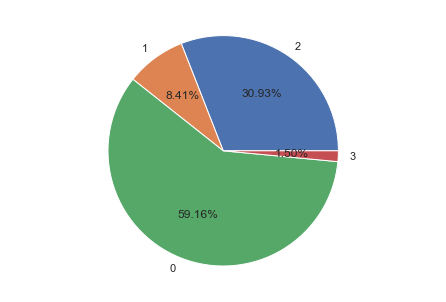

In [58]:
# # w2vpca_cosine_model, w2vpca_cosine_labels =  kmeans_cosine(word2vec_vectors_pca, 4)
pie_chart(w2v_euclidean_labels)

2. Word2vec with pca - Kmeans clustering with euclidean distance

   Cluster  Count
0        1     64
1        2     19
2        0    197
3        3     53


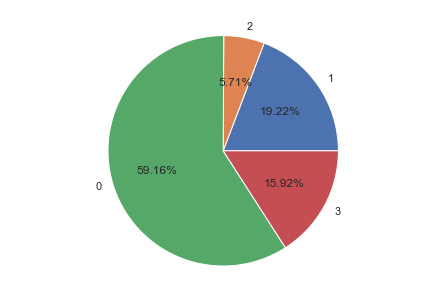

In [59]:
# # w2vpca_cosine_model, w2vpca_cosine_labels =  kmeans_cosine(word2vec_vectors_pca, 4)
pie_chart(w2vpca_euclidean_labels)

3. Word2vec with tdidf - Kmeans clustering with euclidean distance

   Cluster  Count
0        2    176
1        3     89
2        0     59
3        1      9


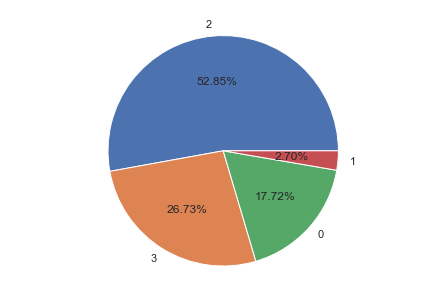

In [60]:
pie_chart(w2vtfidf_euclidean_labels)

4. Word2vec with tdidf and pca - Kmeans clustering with euclidean distance

   Cluster  Count
0        3    201
1        0     73
2        2     52
3        1      7


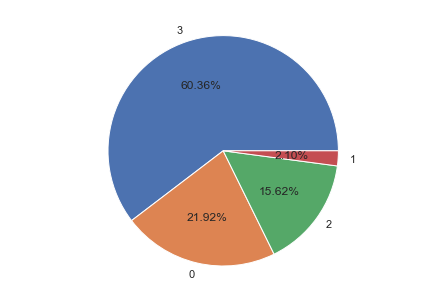

In [61]:
pie_chart(w2v_tfidf_pca_euclidean_labels)

### Hierarchical Clusters

In [62]:
from sklearn.cluster import AgglomerativeClustering

def h_euclidean(X, n):
    Hcluster_euclidean = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    Hlabel_euclidean = Hcluster_euclidean.fit_predict(X)
    return Hcluster_euclidean, Hlabel_euclidean

def h_manhattan(X, n):
    Hcluster_manhattan = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage = 'average')
    Hlabel_manhattan = Hcluster_manhattan.fit_predict(X)
    return Hcluster_manhattan, Hlabel_manhattan

def h_cosine(X, n):
    Hcluster_cosine = AgglomerativeClustering(n_clusters=n, affinity='cosine', linkage = 'single')
    Hlabel_cosine = Hcluster_cosine.fit_predict(X)
    return Hcluster_cosine, Hlabel_cosine

In [63]:
# # Word2Vec with bigrams - Hierarcheal clustering

# Hw2v_euclidean_model, Hw2v_euclidean_labels = h_euclidean(word2vec_vectors, 4)
# Hw2v_manhattan_model, Hw2v_manhattan_labels = h_manhattan(word2vec_vectors, 4)
# Hw2v_cosine_model, Hw2v_cosine_labels = h_cosine(word2vec_vectors, 4)

# Hw2v_euclidean_labels

In [64]:
Hw2v_euclidean_model, Hw2v_euclidean_labels = h_euclidean(word2vec_vectors, 4)
Hw2v_pca_euclidean_model, Hw2v_pca_euclidean_labels = h_euclidean(word2vec_vectors_pca, 4)
Hw2v_tfidf_euclidean_model, Hw2v_tfidf_euclidean_labels = h_euclidean(word2vec_vectors_tfidf, 4)
Hw2v_tfidf_pca_euclidean_model, Hw2v_tfidf_pca_euclidean_labels = h_euclidean(word2vec_vectors_tfidf_pca, 4)

1. Word2Vec - Hierarcheal Clustering with euclidean distance

   Cluster  Count
0        2    118
1        0     13
2        1    197
3        3      5


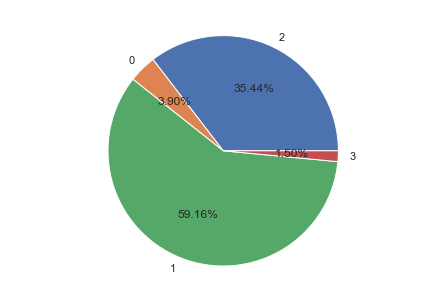

In [65]:
pie_chart(Hw2v_euclidean_labels)

2. Word2Vec with PCA - Hierarcheal Clustering with euclidean distance

   Cluster  Count
0        0     69
1        1     49
2        2     19
3        3    196


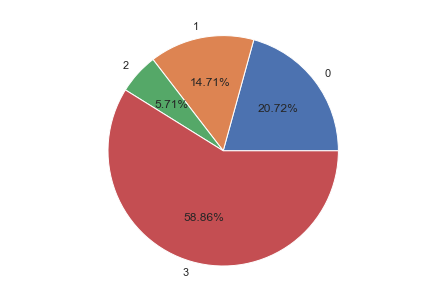

In [66]:
pie_chart(Hw2v_pca_euclidean_labels)

3. Word2Vec with tfidf - Hierarcheal Clustering with euclidean distance

   Cluster  Count
0        0    311
1        3      6
2        2      9
3        1      7


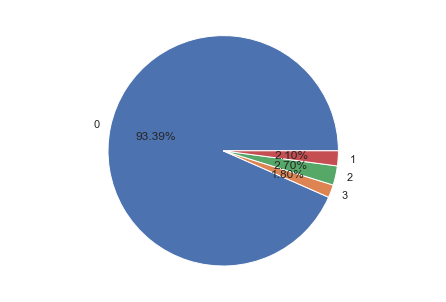

In [67]:
pie_chart(Hw2v_tfidf_euclidean_labels)

4. Word2Vec with tfifd and pca - Hierarcheal Clustering with euclidean distance

   Cluster  Count
0        0    270
1        1     40
2        2     16
3        3      7


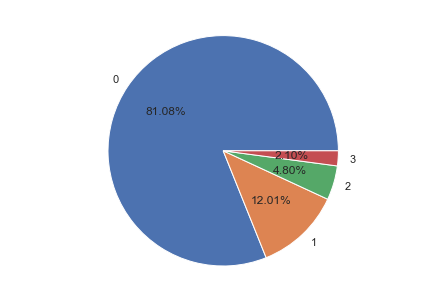

In [68]:
pie_chart(Hw2v_tfidf_pca_euclidean_labels)

In [69]:
# Mapping

In [70]:
# # If the clusters are formed with two clustering sizes, to look at the sub clusters:
# # Returns a data frame
# zippedList =  list(zip(main_label, sub_labels))
# clusters = pd.DataFrame(zippedList, columns = ['Main Division', 'Sub Division'])



# # Maps the main dic to sub dic in the form of a dictionary
# MainDic = {}
# for i in clusters['Main Division']:
#     if i not in MainDic:
#         MainDic[i] = 1
#     else:
#         MainDic[i] += 1`
    

# print(MainDic)
# print("\n")

# SubDic = {}

# # print(clusters.shape[0])
# for index in range(0, clusters.shape[0]-1):
#     a = clusters.iloc[index]
#     division = a['Main Division']
#     irg = a['Sub Division']
# #     print(a['4 Division'], ": ",a['25 Division'])
#     if division not in SubDic:
#         SubDic[division] = []
#         SubDic[division].append([irg, index])
#     else:
#         SubDic[division].append([irg, index])
    
    
# # print(dic25)
# for key, value in SubDic.items():
#     print(key, ' : ', value)
#     print("\n")

In [71]:
# from pandas import DataFrame
# import pandas as pd 
# index, kdiv, kirg, hdiv, hirg = ([] for i in range(5)) 
# print("index ", "kdiv ", "kirg ", "hdiv ","hirg")
# for key, value in Hdic25.items():
#     for i in value:
#         for key1, value1 in dic25.items():
#             for i1 in value1:
#                 if i[1] == i1[1]:
#                     index.append(int(i[1]))
#                     kdiv.append(int(key1))
#                     kirg.append(int(i1[0]))
#                     hdiv.append(int(key))
#                     hirg.append(int(i[0]))
                    
#                     print(i[1]," --> ",key1, " --> ", i1[0], " --> ", key, " --> ",i[0])
# #                     print(i[1],"-->",i1[0],"-->", i[0])


In [72]:
# map_df = pd.DataFrame(list(zip(index, kdiv, kirg, hdiv, hirg)), 
#                columns =['Document Index', 'Kmeans div', 'Kmeans irg', 'H div', 'Hirg']) 

In [73]:
# Freqwords

In [74]:
# wordfreq = {}

# for index, doc in enumerate(datanew):
# #     print(str(labels[index]) + ":" + str(doc))
#     i = labels[index]
#     if i not in wordfreq:
#         temp = {}
        
#         for word in doc:
#             if word not in temp:
#                  temp[word] = 1
#             else:
#                  temp[word] += 1
#         wordfreq[i] = temp
#     else:
#         atemp = wordfreq[i]
#         for word in doc:
#             if word not in atemp:
#                  atemp[word] = 1
#             else:
#                  atemp[word] += 1
#         wordfreq[i] = atemp
        
# print(wordfreq)

In [75]:
# a = {k: v for k, v in sorted(wordfreq[0].items(), key=lambda item: item[1],reverse=True)}
# print(a)
# # print(len(a))

# Evaluations

### Visualization

Done for 2 dimensional vector -- word 2 vec with pca

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [77]:
def plot(df, labels, model):
    plt.scatter(df['0'], df['1'], c= labels, s=20, cmap='viridis')

    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

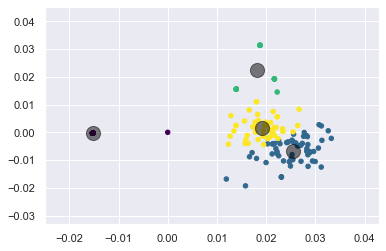

In [78]:
# call plot function with word2vec-pca dataframe,  word2vec-pca labels and kmeans model
plot(word2vec_vectors_pca, w2vpca_euclidean_labels, w2vpca_euclidean_model)

### Internal Evaluation

In [79]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

In [80]:
def clusterReport(dataset, labels):
    report = []
    silhoutte = metrics.silhouette_score(dataset, labels, metric='euclidean')
    report.append(silhoutte)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    report.append(calinski)
    davies = davies_bouldin_score(dataset, labels)
    report.append(davies)
    return report

In [81]:
# silhoutte
# The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
# Scores around zero indicate overlapping clusters.
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


# calsinski
# the Variance Ratio Criterion - can be used to evaluate the model, 
# where a higher Calinski-Harabasz score relates to a model with better defined clusters.
# The index is the ratio of the sum of between-clusters dispersion and 
# of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


# Davies
# This index signifies the average ‘similarity’ between clusters, where the similarity is a measure 
# that compares the distance between clusters with the size of the clusters themselves.
# Zero is the lowest possible score. 
# Values closer to zero indicate a better partition.

In [82]:

# # Word2Vec
# print('Word2Vec with K means Cluster using cosine distance\n')
# clusterReport(word2vec_vectors, w2v_cosine_labels)
# print('\n')
# print('Word2Vec with K means Cluster using eucidean distance\n')
# clusterReport(word2vec_vectors, w2v_euclidean_labels)

# # Word2Vec - PCA
# print('\n')
# print('Word2Vec and PCA with K means Cluster using euclidean distance\n')
# clusterReport(word2vec_vectors_pca, w2vpca_euclidean_labels)




In [83]:
table = []
def generate_report(report, name):
    
    report.insert(0, name)
    table.append(report)

In [84]:

word2vec_Kmeans_report = clusterReport(word2vec_vectors, w2v_euclidean_labels)
word2vec_pca_Kmeans_report = clusterReport(word2vec_vectors_pca, w2vpca_euclidean_labels)
word2vec_tfidf_Kmeans_report = clusterReport(word2vec_vectors_tfidf, w2vtfidf_euclidean_labels)
word2vec_tfidf_pca_Kmeans_report = clusterReport(word2vec_vectors_tfidf_pca, w2v_tfidf_pca_euclidean_labels)


word2vec_h_report = clusterReport(word2vec_vectors, Hw2v_euclidean_labels)
word2vec_pca_h_report = clusterReport(word2vec_vectors_pca, Hw2v_pca_euclidean_labels)
word2vec_tfidf_h_report = clusterReport(word2vec_vectors_tfidf, Hw2v_tfidf_euclidean_labels)
word2vec_tfidf_pca_h_report = clusterReport(word2vec_vectors_tfidf_pca, Hw2v_tfidf_pca_euclidean_labels)

generate_report(word2vec_Kmeans_report, "word2vec_Kmeans_report")
generate_report(word2vec_pca_Kmeans_report, "word2vec_pca_Kmeans_report")
generate_report(word2vec_tfidf_Kmeans_report, "word2vec_tfidf_Kmeans_report")
generate_report(word2vec_tfidf_pca_Kmeans_report, "word2vec_tfidf_pca_Kmeans_report")
generate_report(word2vec_h_report, "word2vec_h_report")
generate_report(word2vec_pca_h_report, "word2vec_pca_h_report")
generate_report(word2vec_tfidf_h_report, "word2vec_tfidf_h_report")
generate_report(word2vec_tfidf_pca_h_report, "word2vec_tfidf_pca_h_report")

# table

In [85]:
print("Silhoutte Score: Range: -1 to 1, 1 being dense cluster")
print("Calinski Score: Higher score - better defined cluster")
print("Davies Score: Values closer to zero indicate a better partition.")

Silhoutte Score: Range: -1 to 1, 1 being dense cluster
Calinski Score: Higher score - better defined cluster
Davies Score: Values closer to zero indicate a better partition.


In [86]:
# from tabulate import tabulate
# names = ["Cluster Name", "Silhoutte Score", "Calinski Score", "Davies Score"]
# print(tabulate(table, headers = names, tablefmt = "grid"))

internal_df = pd.DataFrame(table, 
               columns =["Cluster Name", "Silhoutte Score", "Calinski Score", "Davies Score"]) 
# internal_df

In [87]:
cm = sns.light_palette("orange", as_cmap=True)

(internal_df.style
  .background_gradient(cmap=cm, subset=["Silhoutte Score", "Calinski Score", "Davies Score"])
  .highlight_max(subset=["Silhoutte Score", "Calinski Score", "Davies Score"])
  .set_caption('Highest to lowest - Yellow to Orange')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,Cluster Name,Silhoutte Score,Calinski Score,Davies Score
0,word2vec_Kmeans_report,0.608648,82.665214,2.095075
1,word2vec_pca_Kmeans_report,0.755481,2685.620988,0.661937
2,word2vec_tfidf_Kmeans_report,0.057394,14.320206,3.400851
3,word2vec_tfidf_pca_Kmeans_report,0.372268,177.486612,0.918726
4,word2vec_h_report,0.614404,84.090788,1.435373
5,word2vec_pca_h_report,0.745028,2403.959465,0.706882
6,word2vec_tfidf_h_report,0.182765,16.062921,0.759993
7,word2vec_tfidf_pca_h_report,0.405432,172.654950,0.695238


### Counting pair measures

In [88]:
import itertools 
import math

In [89]:
# Jacard:
# The Jaccard index is used to quantify the similarity between two datasets.
# It is verysimilar to the Rand Index, however it disregards the pairs of elements that
# are in different clusters for both clusterings

# Rand:
# One can also view the Rand index as a measure of the percentage of correct decisions made by the algorithm
# R ranges from 0 (no pair classified in the same way under both clusterings)
# to 1 (identical clusterings). The value of R depends on both, the number
# of clusters and the number of elements.

# Fowlkes-Mallows:
# this measure can be interpreted as
# the geometric mean of precision (ratio of the number of retrieved relevant
# documents to the total number of retrieved documents = n11/n11+n10 and recall
# (ratio of the number of retrieved relevant documents to the total number of
# relevant documents = n11/n11+n01

# Mirkin:
# It corresponds to the Hamming distance for binary vectors.

# Dice:
# The Dice symmetric measure doubles the weight on TP while still ignoring TN:


# The Partition Difference:
# simply counts the pairs of elements that belong
# to different clusters unter both clusterings:


In [90]:
def counting_pair_measures(labels1, labels2):
    n11 = n10 = n01 = n00 = 0
    n = len(labels1)
    for i, j in itertools.combinations(range(n), 2):
        c1 = labels1[i] == labels1[j]
        c2 = labels2[i] == labels2[j]
        if c1 and c2:
            n11 += 1
        elif c1 and not c2:
            n10 += 1
        elif not c1 and c2:
            n01 += 1
        elif not c1 and not c2:
            n00 += 1
    jacard = float(n11) / (n11 + n10 + n01)
    rand = (n11 + n00)/(n)
    p = n11/(n11+n10)
    r = n11/(n11+n01)
    fowlkes = math.sqrt(p*r)
    mirkin = 2*(n01 + n10)
    partition = n00
    dice = (2*n11)/((2*n11) + n10 + n01)
    report = []
    report.extend([n00, n11, n10, n01,p, r, jacard, rand,fowlkes, mirkin, partition, dice ])
#     report += "n00: "+ str(n00)+ " n11: "+ str(n11)+ " n10: "+ str(n10)+ " n01: "+ str(n01) +"\n"
#     report += "Jacard Similarity of two clusters: "+  str(jacard)+"\n"
#     report +="Rand Similarity of two clusters: "+ str(rand)+"\n"
#     report +="Precision and recall of two clusters: "+ str(p)+ " , "+ str(r)+"\n"
#     report +="Fowlkes Similarity of two clusters: " +  str(fowlkes)+"\n"
#     report +="Mirkin Similarity of two clusters: "+ str(mirkin)+"\n"
#     report +="Dice Similarity of two clusters: "+ str(dice)+"\n"
#     report +="Partition Similarity of two clusters: " + str(partition)+"\n"
    return report

    

In [91]:
# Compare labels for kmeans cluster and hierrarcheal cluster

word2vec_k_h = counting_pair_measures(w2v_euclidean_labels, Hw2v_euclidean_labels)
word2vec_pca_k_h = counting_pair_measures(w2vpca_euclidean_labels, Hw2v_pca_euclidean_labels)
word2vec_tfidf_k_h = counting_pair_measures(w2vtfidf_euclidean_labels, Hw2v_tfidf_euclidean_labels)
word2vec_tfidf_pca_k_h = counting_pair_measures(w2v_tfidf_pca_euclidean_labels, Hw2v_tfidf_pca_euclidean_labels)



In [92]:
print("A similarity measure between two clusters (kmeans and hierarcheal)")
counting_pair_list = [word2vec_k_h, word2vec_pca_k_h, word2vec_tfidf_k_h, word2vec_tfidf_pca_k_h]
# counting_pair_list
counting_pair_df = pd.DataFrame(counting_pair_list, 
               columns =['n00', 'n11', 'n10', 'n01', 'precision', 'recall', 
                         'Jacard Similarity', 'Rand Similarity', 'Fowlkes Similarity', 'Mirkin Similarity',
                         'Partition Similarity', 'Dice Similarity'], index = ['w2v', 'w2v with pca', 'w2v with tfidf', 'w2v with tfidf and pca']) 
# counting_pair_df

A similarity measure between two clusters (kmeans and hierarcheal)


In [93]:
cm = sns.light_palette("orange", as_cmap=True)

(counting_pair_df.style
  .background_gradient(cmap=cm, subset=['n00','n00', 'n11', 'n10', 'n01', 'precision', 'recall', 
                         'Jacard Similarity', 'Rand Similarity', 'Fowlkes Similarity', 'Mirkin Similarity',
                         'Partition Similarity', 'Dice Similarity'])
  .highlight_max(subset=['n00', 'n00', 'n11', 'n10', 'n01', 'precision', 'recall', 
                         'Jacard Similarity', 'Rand Similarity', 'Fowlkes Similarity', 'Mirkin Similarity',
                         'Partition Similarity', 'Dice Similarity'])
  .set_caption('Highest to lowest - Yellow to Orange')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,n00,n11,n10,n01,precision,recall,Jacard Similarity,Rand Similarity,Fowlkes Similarity,Mirkin Similarity,Partition Similarity,Dice Similarity
w2v,28786,24752,195,1545,0.992183,0.941248,0.934320,160.774775,0.966380,3480,28786,0.966045
w2v with pca,31378,21774,1097,1029,0.952035,0.954874,0.911046,159.615616,0.953454,4252,31378,0.953453
w2v with tfidf,6273,20335,728,27942,0.965437,0.421215,0.414958,79.903904,0.637696,57340,6273,0.586530
w2v with tfidf and pca,14190,20223,3852,17013,0.840000,0.543103,0.492188,103.342342,0.675431,41730,14190,0.659686


After these evaluations, it is observed that Word2Vector with PCA model is giving the better results comparatively.

In [94]:
# <!-- ### Word2Vec Hyper-Parameters Measure -->

In [95]:
# def hyperparameters(s, win, m, wor): 
#     bigrams = phrases.Phrases(datanew)
#     # model = Word2Vec(datanew, size=100, window= 5, min_count=2, workers=4)
#     model = Word2Vec(bigrams[datanew], size=s, window=win, min_count=m, workers=wor)
#     word_vectors = model.wv   
#     l = []
#     for i in datanew:
#         l.append(vectorizer(i, model))
#     X = np.array(l)
#     n = 4
#     kmeans = KMeans (n_clusters = n,
#                     max_iter = 100,
#                     init = 'k-means++',
#                     n_init = 1)
#     K_labels = kmeans.fit_predict(X)
#     print("kmeans")
#     clusterReport(X, K_labels)

#     Hcluster_euclidean = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#     H_labels = Hcluster_euclidean.fit_predict(X)
#     print("Hierarcheal")
#     clusterReport(X, H_labels)
    
#     counting_pair_measures(K_labels, H_labels)
    

In [96]:
# hyperparameters(200, 5, 2, 4)
# print('\n')
# hyperparameters(100, 5, 2, 4)
# print('\n')
# hyperparameters(50, 5, 2, 4)

In [97]:
# file1 = open("TopicModelling.txt","w") 

In [98]:

# file1.write("Word2Vector \n")

# file1.write("\n Word2vector with bigrams\n")
# file1.write("Using Kmeans Clustering\n")
# file1.write("%s" % w2v_euclidean_labels)
# file1.write("\n Using Hieracheal Clustering\n")
# file1.write("%s" % Hw2v_euclidean_labels)


# file1.write("\n Word2vector with bigrams and pca\n")
# file1.write("Using Kmeans Clustering\n")
# file1.write("%s" % w2vpca_euclidean_labels)
# file1.write("\n Using Hieracheal Clustering\n")
# file1.write("%s" % Hw2v_pca_euclidean_labels)

# file1.write("\n Word2vector with TFIDF\n")
# file1.write("Using Kmeans Clustering\n")
# file1.write("%s" % w2vtfidf_euclidean_labels)
# file1.write("\n Using Hieracheal Clustering\n")
# file1.write("%s" % Hw2v_tfidf_euclidean_labels)

# file1.write("\n Word2vector with TFIDF and pca\n")
# file1.write("Using Kmeans Clustering\n")
# file1.write("%s" %  w2v_tfidf_pca_euclidean_labels)
# file1.write("\n Using Hieracheal Clustering\n")
# file1.write("%s" % Hw2v_tfidf_pca_euclidean_labels)

# file1.write("\n")
# file1.write("\n Internal Evaluation for the clusters\n")
# file1.write("\n Word2vec for kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_Kmeans_report)
# file1.write("\n")
# file1.write("%s" % word2vec_h_report)

# file1.write("\n Word2vec with pca for kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_pca_Kmeans_report )
# file1.write("\n")
# file1.write("%s" % word2vec_pca_h_report)

# file1.write("\n Word2vec with tfidf with kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_tfidf_Kmeans_report)
# file1.write("\n")
# file1.write("%s" % word2vec_tfidf_h_report)

# file1.write("\n Word2vec wit tfidf and pca with kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_tfidf_pca_Kmeans_report)
# file1.write("\n")
# file1.write("%s" % word2vec_tfidf_pca_h_report)

# file1.write("\n Counting pair evaluation\n")

# file1.write("\n Comparing word2vec kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_k_h)
# file1.write("\n Comparing word2vec pca kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_pca_k_h )
# file1.write("\n Comparing word2vec tfidf kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_tfidf_k_h)
# file1.write("\n Comparing word2vec tfidf with pca kmeans and hierarcheal\n")
# file1.write("%s" % word2vec_tfidf_pca_k_h)

# file1.write("\n")
# file1.write("Latent Semantic Analysis \n")
# file1.write("Latent Semantic Analysis produces a similarity matrix for the corpus and clusters are computed those matrix.\n")
# file1.write("LSA Cluster using Spectral Clustering: %s" % lsa_cluster_array)
# file1.write("\n")
# file1.write("LSA Cluster using Spectral Clustering: %s" % lsa_dbscan)
# file1.write("\n")


# file1.write("\n")
# file1.write("Latent Dirichlet Allocation \n")
# file1.write("LDA Model %s" % lda_model)
# file1.write("\n")
# file1.write("LDA word percentages for each cluster: %s" % lda_words)
# file1.write("\n")


# file1.write("\n")
# file1.write("Non Negative Matrix Factorization \n")
# file1.write("NMF Parameters: %s" % nmf_model)
# file1.write("\n")
# file1.write("Frequent words in NMF for each cluster \n")
# file1.write("%s" % freq_words)
# file1.write("\n")
# file1.write("NMF labels\n")
# file1.write("%s" % nmf_labels)
# file1.write("\n")
# file1.write("cluster counts \n")
# file1.write("%s" % counts)
# file1.write("\n")







# 2. Latent Semantic Analysis

In [99]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [100]:
def lsa_similarity_matrix():
#     vectorizer values
    vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
    dtm = vectorizer.fit_transform(Text['Updated'])
    
#     pd.DataFrame(dtm.toarray(),index=Text['Division'],columns=vectorizer.get_feature_names
#     ()).head(10)

#     All the feature names of the words in the documents
    vectorizer.get_feature_names()
    
#     Lsa method - reduced to 2 vectors
    lsa = TruncatedSVD(2, algorithm = 'randomized')
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
    
#     Prints the data frame with 2 components as rows and words as columns
    pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =
    vectorizer.get_feature_names())
    
#     Prints the data frame with 2 vector components as columns and documents as rows
    pd.DataFrame(dtm_lsa, index = Text['Division'], columns = ["component_1","component_2"])
    
#     Similarity between the 2 Component vectors.
    similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
    
#     prints the similarity between all the documents in the form of matrix
    similarity_matrix = pd.DataFrame(similarity,index=Text['Division'], columns=Text['Division'])
    return similarity_matrix
    

In [101]:
# calls the function lsa 
similarity_matrix = lsa_similarity_matrix()
# similarity_matrix

LSA gives a similarity matix which gives the vectors as output in dataframe. 
The data frame has similarity between all the documents in the form of matrix

### Clustering

The clustering is done using two techniques.
1. Spectral Clustering
2. DB Scan

1. Spectral clusterung is applied for a similarity matrix.

In [102]:
import numpy as np
from sklearn.cluster import SpectralClustering

In [103]:
def spectral_cluster(similarity_matrix, n):

    lsa_cluster_array = SpectralClustering(n).fit_predict(similarity_matrix)
    return lsa_cluster_array

   Cluster  Count
0        1     26
1        0    228
2        2     37
3        3     42


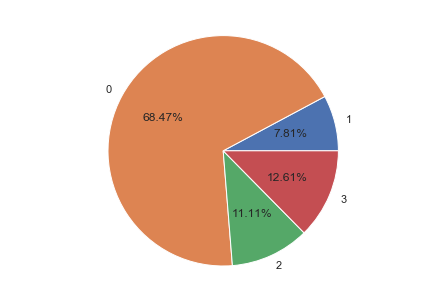

In [104]:
lsa_cluster_array = spectral_cluster(similarity_matrix, 4)
# lsa_cluster_array
pie_chart(lsa_cluster_array)

2. For the cases you want the algorithm to figure out the number of clusters by itself, 
you can use Density Based Clustering Algorithms like DBSCAN:

    Cluster  Count
0         0     21
1         1    216
2         2      3
3         3      3
4         4     30
5         5      2
6         6      1
7         7      1
8         8      9
9         9      3
10       10     39
11       11      1
12       12      1
13       13      1
14       14      1
15       15      1


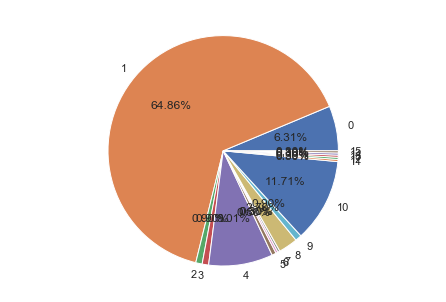

In [105]:
from sklearn.cluster import DBSCAN
lsa_dbscan = DBSCAN(min_samples=1).fit_predict(similarity_matrix)
pie_chart(lsa_dbscan)

# Evaluation

### Internal Evaluation

In [106]:
lsa_spectral_report = clusterReport(similarity_matrix, lsa_cluster_array)
lsa_dbscan_report = clusterReport(similarity_matrix, lsa_dbscan)

lsa_report = [lsa_spectral_report, lsa_dbscan_report]

lsa_internal_df = pd.DataFrame(lsa_report, 
               columns =["Silhoutte Score", "Calinski Score", "Davies Score"], index = ["LSA with spectral", "LSA with DBScan"]) 

In [107]:
cm = sns.light_palette("orange", as_cmap=True)

(lsa_internal_df.style
  .background_gradient(cmap=cm, subset=["Silhoutte Score", "Calinski Score", "Davies Score"])
  .highlight_max(subset=["Silhoutte Score", "Calinski Score", "Davies Score"])
  .set_caption('Highest to lowest - Yellow to Orange')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,Silhoutte Score,Calinski Score,Davies Score
LSA with spectral,0.742229,1459.340080,0.303644
LSA with DBScan,0.471758,486.515150,0.285430


### Counting Pair evaluation between spectral and DBscan

In [108]:
lsa_spectral_dbscan = counting_pair_measures(lsa_cluster_array, lsa_dbscan)
lsa_spectral_dbscan = [lsa_spectral_dbscan]

In [109]:
lsa_counting_pair_df = pd.DataFrame(lsa_spectral_dbscan, 
               columns =['n00', 'n11', 'n10', 'n01', 'precision', 'recall', 
                         'Jacard Similarity', 'Rand Similarity', 'Fowlkes Similarity', 'Mirkin Similarity',
                         'Partition Similarity', 'Dice Similarity'], index = ["LSA between spectral and dbscan"]) 
lsa_counting_pair_df

,n00,n11,n10,n01,precision,recall,Jacard Similarity,Rand Similarity,Fowlkes Similarity,Mirkin Similarity,Partition Similarity,Dice Similarity
LSA between spectral and dbscan,27548,24652,3078,0,0.889001,1.0,0.889001,156.756757,0.942869,6156,27548,0.941239


# 3. Latent Dirichlet Allocation

In [110]:
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...
# dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)


dictionary_LDA = corpora.Dictionary(datanew)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in datanew]


In [111]:
# for k, v in dictionary_LDA.items():
#     print(v)

In [112]:
# corpus

In [113]:
# len(corpus)

In [114]:
def lda():
    num_topics = 4
    lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                      id2word=dictionary_LDA, \
                                      passes=4, alpha=[0.01]*num_topics, \
                                      eta=[0.01]*len(dictionary_LDA.keys()))
    lda_words = {}
    for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
        print(str(i)+": "+ topic)
        lda_words[i] = topic
    return lda_model, lda_words
    

In [115]:
print("word distribuion in each cluster")
lda_model, lda_words = lda()

word distribuion in each cluster
0: 0.068*"movi" + 0.039*"I" + 0.022*"watch" + 0.017*"cricket" + 0.016*"medic" + 0.015*"peopl" + 0.015*"tenni" + 0.015*"the" + 0.012*"trump" + 0.012*"best"
1: 0.062*"tenni" + 0.039*"the" + 0.031*"year" + 0.023*"day" + 0.021*"player" + 0.020*"icc" + 0.016*"show" + 0.016*"test" + 0.014*"cricket" + 0.013*"I"
2: 0.037*"tenni" + 0.035*"cricket" + 0.021*"australian" + 0.020*"one" + 0.019*"australia" + 0.019*"play" + 0.018*"medic" + 0.016*"today" + 0.015*"A" + 0.015*"year"
3: 0.046*"medic" + 0.025*"tenni" + 0.022*"cricket" + 0.021*"doctor" + 0.017*"new" + 0.016*"world" + 0.016*"amp" + 0.016*"the" + 0.014*"senat" + 0.012*"modi"


In [116]:
# lda_model.get_topic_terms(topicid = 2, topn=20)

In [117]:
# lda_model.get_term_topics(word_id = 288, minimum_probability=None)

In [118]:
# for i in corpus:
#     print(lda_model[i])

In [119]:
# for a in lda_model.get_document_topics(bow = corpus, minimum_probability=None, minimum_phi_value=None, per_word_topics=False):
#     print(a)
    

In [120]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [121]:
# 4. Doc2Vec

In [122]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [123]:
data = Text['Updated'].to_list()

In [124]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

# tagged_data

In [125]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size, alpha=alpha,min_alpha=0.00025, min_count=1, dm =1)
  
model.build_vocab(tagged_data)

In [126]:
# for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
#     model.train(tagged_data,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

# model.save("d2v.model")
# print("Model Saved")

In [127]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
# test_data = word_tokenize("I love chatbots".lower())
# v1 = model.infer_vector(test_data)
# print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
# print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
# print(model.docvecs['1'])

In [128]:
# model.docvecs

In [129]:
# print(similar_doc)


In [130]:
final_array = []

for i in range(241):
    temp = []
    simi = model.docvecs[i]
#     temp.append(i)
    for j in simi:

        temp.append(j)
#         temp.append(vec)
    final_array.append(temp)
    

In [131]:
# final_array

In [132]:
d2v_euclidean_model, d2v_euclidean_labels = kmeans_euclidean(final_array, 4)

# 5. Non Negative Matrix Factorization

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
def nmf():
    tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = tfidf.fit_transform(Text['Updated'])
    nmf_model = NMF(n_components=4, random_state=101)
    print("nmf_model")
    print(nmf_model)
    nmf_model = nmf_model.fit(dtm)
    freq_words = {}
    print("Words in the model\n")
    for index, topic in enumerate(nmf_model.components_):
        print(f"The new models# {index}")
        words = [tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]]
        freq_words[index] = words
        print(words)
        print('\n')
        
        
    topic_model = nmf_model.transform(dtm)
    nmf_labels = topic_model.argmax(axis =1)
    print("nmf lables")
    print(nmf_labels)
    Text['topic'] = topic_model.argmax(axis =1)
    model = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
    Text['Title'] = Text['topic'].map(model)
    Text.head()
    counts = Text['topic'].value_counts()
#     print("nmf Counts")
#     print(counts)
    return nmf_model, freq_words, topic_model, nmf_labels, counts

In [152]:
nmf_model, freq_words, nmf_vec, nmf_labels, counts = nmf()


nmf_model
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=101, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)
Words in the model

The new models# 0
['work', 'presid', 'ye', 'great', 'think', 'amaz', 'thank', 'night', 'thi', 'wa', 'best', 'want', 'rt', 'watch', 'movi']


The new models# 1
['champion', 'wrong', 'match', 'nike', 'right', 'play', 'australia', 'bet', 'rais', 'open', 'guy', 'day', 'player', 'australian', 'tenni']


The new models# 2
['kohli', 'iccaward', 'spirit', 'win', 'virat', 'odi', 'rt', 'award', 'player', '2019', 'team', 'test', 'icc', 'year', 'cricket']


The new models# 3
['senat', 'thi', 'modi', 'femal', 'https', 'say', 'trump', 'help', 'new', 'look', 'associ', 'amp', 'doctor', 'medic', 'rt']


nmf lables
[2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 3 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 0 0 0 0 0 3 0 0 0 0 0 1 0 0
 0 0 3 0 0 3 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 

   Cluster  Count
0        2     64
1        3    152
2        0     48
3        1     69


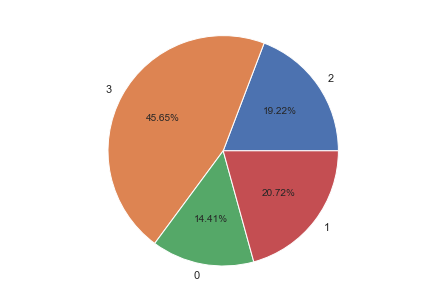

In [159]:
pie_chart(nmf_labels)

### Internal Evaluation

NMF Kmeans Report

In [172]:
kmeans_nmf = KMeans (n_clusters = 4,
                    max_iter = 100,
                    init = 'k-means++',
                    n_init = 1)
nmf_kmeans_labels = kmeans_nmf.fit_predict(nmf_vec)
nmf_kmeans_labels

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 0, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 0,
       1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3,

In [173]:
nmf_kmeans_report = clusterReport(nmf_vec, nmf_kmeans_labels)
nmf_kmeans_report 

[0.5019813760022528, 208.23357427038377, 0.6955898767047408]

In [174]:
nmf_report = clusterReport(nmf_vec, nmf_labels)
nmf_report = [nmf_report]
nmf_df = pd.DataFrame(nmf_report, 
               columns =["Silhoutte Score", "Calinski Score", "Davies Score"], index = ["NMF"]) 
nmf_df

,Silhoutte Score,Calinski Score,Davies Score
NMF,0.455764,171.581266,0.805417


In [161]:
# nmf_kmeans_labels

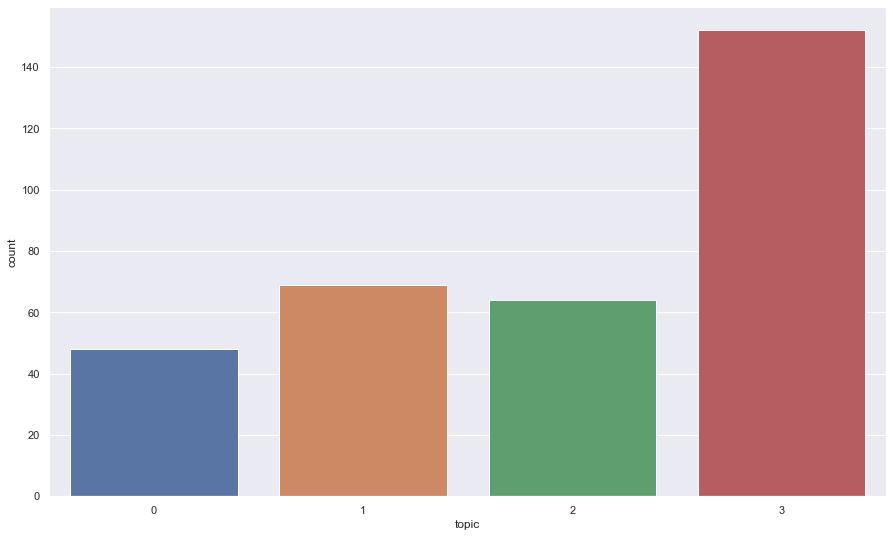

In [135]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,9))
# sns.countplot(x = 'topic', data = Text)